### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img0 = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/linfo1.png")

img=cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

(720, 1280, 3)


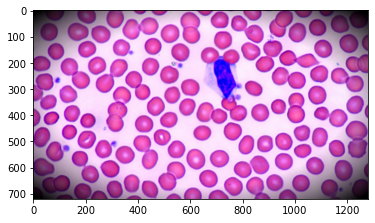

In [3]:
plt.imshow(img)
print(img.shape)

### Imágen binaria
Una imagen binaria es una imagen digital que tiene únicamente dos valores posibles para cada píxel (un valor alto y un valor bajo). 

Normalmente, los colores utilizados para su representación son negro y blanco, aunque puede usarse cualquier pareja de colores. 

Uno de los colores se emplea como fondo y el otro para los objetos que aparecen en la imagen. 

La imagen binaria puede ser de cualquier tipo de dato, incluso de tipo booleano (Con valores True - False).

### Umbralización
La umbralización es uno de los métodos más simples y eficientes de segmentación, segmentar quiere decir, separar o extraer las regiones de una imagen que nos interese estudiar o analizar. 

Para lograr separar la región deseada se establece un valor que define el umbral, los pixeles cuya intensidad superen el umbral serán rechazado o aceptados, según sea el caso.

En OpenCV podemos aplicar esta técnica mediante la función ```cv::threshold```. 

Hay disponibles varios tipos de umbralización, esta función puede trabajar con los siguiente métodos:
```
cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV
```

(720, 1280, 3)
125.0


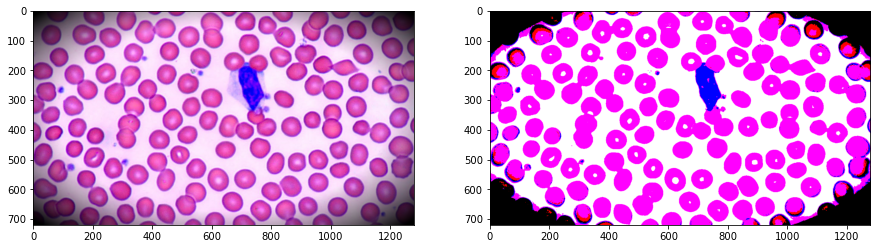

In [4]:
Umb,imgB=cv2.threshold(img,125,255,cv2.THRESH_BINARY)
print (np.shape(imgB))
print(Umb)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

```
cv2.THRESH_BINARY
```
Todo lo que está por encima del valor del umbral se asigna el valor alto y todo lo que está por debajo le asigna el valor bajo.

(720, 1280)
125.0


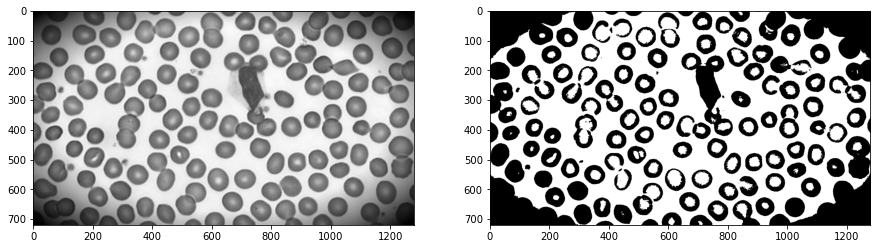

In [5]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Umb,imgB=cv2.threshold(img,125,255,cv2.THRESH_BINARY)
print (np.shape(imgB))
print(Umb)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

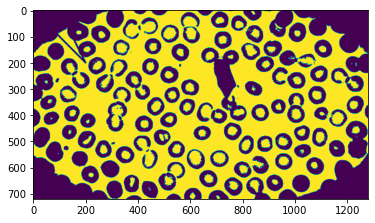

In [6]:
derecha = np.array([[0,0],[100,0],[200,200]], np.int32)
imgB = cv2.polylines(imgB.copy(),[derecha],True,(0,0,0), 5)
plt.imshow(imgB)

```
cv2.THRESH_BINARY_INV
```
Todo lo que está por encima del valor del umbral se asigna el valor bajo y todo lo que está por debajo le asigna el valor alto.

(720, 1280)


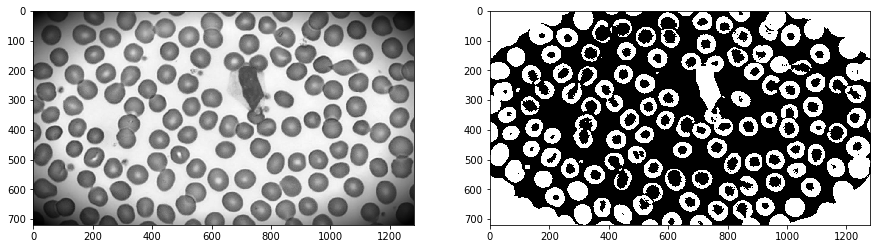

In [6]:
Umb,imgB=cv2.threshold(img,125,255,cv2.THRESH_BINARY_INV)
print (np.shape(imgB))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

```
cv2.THRESH_TRUNC
```
Todo lo que está por encima del valor del umbral se asigna el valor alto y todo lo que está por debajo le deja el valor el pixel original.

(720, 1280)


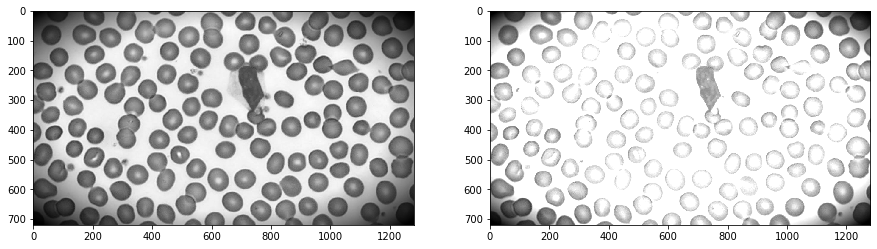

In [26]:
Umb,imgB=cv2.threshold(img,125,255,cv2.THRESH_TRUNC)
print (np.shape(imgB))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

```
cv2.THRESH_TOZERO
```
Todo lo que está por encima del valor del umbral le deja su valor original y todo lo que está por debajo le asigna el valor bajo.

(720, 1280)


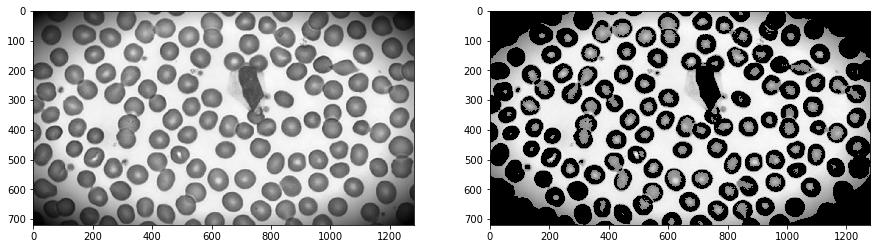

In [27]:
Umb,imgB=cv2.threshold(img,125,255,cv2.THRESH_TOZERO)
print (np.shape(imgB))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

```
cv2.THRESH_TOZERO_INV
```
Todo lo que está por encima del valor del umbral le asigna el valor bajo y todo lo que está por debajo le deja el valor original.

(720, 1280)


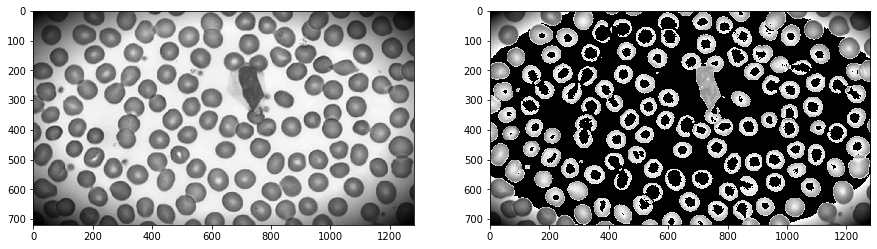

In [28]:
Umb,imgB=cv2.threshold(img,125,255,cv2.THRESH_TOZERO_INV)
print (np.shape(imgB))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

In [29]:
#calculo de un mejor umbral
media=np.mean(img)
desvS=np.std(img)
print(media, desvS)

153.44080078125 63.06146403909904


153.0


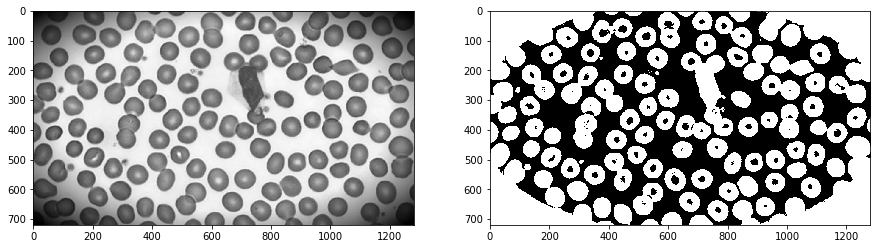

In [30]:
Umb,imgB=cv2.threshold(img,media,255,cv2.THRESH_BINARY_INV)
print (Umb)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

In [31]:
pcm=media+desvS

216.0


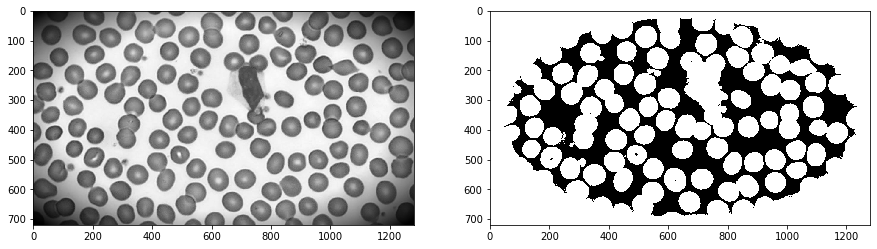

In [32]:
Umb,imgB=cv2.threshold(img,pcm,255,cv2.THRESH_BINARY_INV)
print (Umb)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

### Umbralización de Otsu
La umbralización de Otsu es de utilidad con imágenes bimodales, en donde el algoritmo de Otsu intenta encontrar un valor umbral $Umb$ que minimice la variación ponderada dentro de la clase dada por la relación:

$$σ^2_{w}( t ) = q_{1}(t)σ^{2}_{1}(t)+q_{2}(t)σ^{2}_{2}(t)$$

Para efectos prácticos, encuentra un valor $Umb$ que se encuentra entre dos picos, de modo que las variaciones en ambas clases son mínimas.

163.0


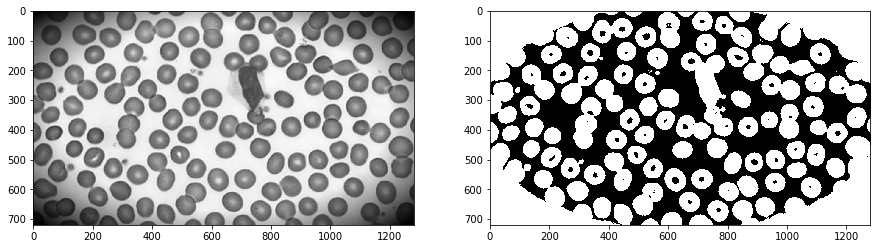

In [33]:
Umb,imgB=cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print (Umb)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgB, cmap='gray')

### Umbral adaptativo
El algoritmo calcula el umbral para pequeñas regiones de la imagen. Por lo tanto, obtenemos diferentes umbrales para diferentes regiones de la misma imagen y nos da mejores resultados para imágenes con iluminación variable.

```
cv2.adaptiveThreshold(Img, maxVa, MétodoU, MétodoP, TamañoVen, C)
Img       : Imagen de 8bits.
maxVa     : Valor alto
MétodoU   : Metodos del umbral adaptativo 
                cv2.ADAPTIVE_THRESH_MEAN_C
                cv2.ADAPTIVE_THRESH_GAUSSIAN_C. Vea los detalles a continuación.
MétodoP   : Tipo de asignación de pixeles 
                cv2.THRESH_BINARY
                cv2.THRESH_BINARY_INV
TamañoVen : tamaño de la ventana para calcular el umbral: 3, 5, 7, etc.
C         : Constante que se le resta al valor del umbral calculado
```

```
cv2.ADAPTIVE_THRESH_MEAN_C
```
La ventana que recorre toda la imagen tienen pesos iguales, por lo tanto, calcula un promedio de la ventana como el valor de umbralización.

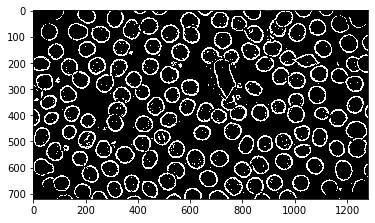

In [34]:
imgB = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,7)
plt.imshow(imgB, cmap='gray', vmin=0, vmax=255)

```
cv2.ADAPTIVE_THRESH_GAUSSIAN_C
```
La ventana que recorre toda la imagen tienen pesos iguales, por lo tanto, calcula un promedio de la ventana como el valor de umbralización.

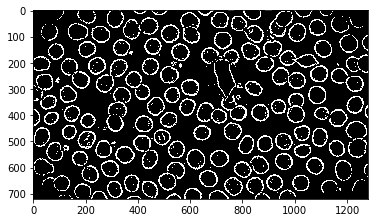

In [35]:
#imagen, nivel, tipo, umbral, vecinos, constante que se resta al umbral
imgB = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,17,7)
plt.imshow(imgB, cmap='gray', vmin=0, vmax=255)